# Q1 What types of machine learning, if any, best describe the followingscenarios:




A. Your input data is a list of numbers and your output is those numbers in random order. You have a largenumber of samples with the input and output data described in the previous sentence. Your system tries to predict the output given an input list.

Ans: Supervised Learning

B. A boat classification system is created to detect the boats that cross under a bridge. The developers obtain the exact specifications of every boat they plan on classifying. The specifications allow the developers to derive a statisical model using the dimension and shape of the boat, size of wake behind the boat, etc. which can then be used to classify boats. Assume you have a measuring device that can accurately give you all of the information.

Ans: Unsupervised Learning

C. A system develops strategies to win at chess by playing repeatedly and adjusting its stragegy by penalizing moves that lead to losing the game.

Ans: Reinforcement Learning

# Q2. When we discussed the Perceptron Learning Algorithm (PLA) we updated the weights using the rule $w(t + 1) = w(t) + y(t)x(t)$. This rule moved the Perceptron in the direction of classifying x(t) correctly.

## A. Effect of Moving the Highlighted Term to the Right

Switching the order of multiplication doesn't change anything because $( ab = ba )$. So, $x(t)y(t) $is the same as $y(t)x(t)$, and the weights are still updated correctly based on the input and its classification.

##B. Effect of removing the highlighted term in red as shown here $x(t)y(t)$?

This would make the update rule ineffective for learning. It wouldn't consider if the classification is right or wrong. The weights would always be adjusted in the same direction, no matter the actual class of $x(t)$. This would cause mistakes to keep happening.

##C. Mathematical Demonstration that $y(t)w^T(t)x(t) < 0$

The perceptron misclassifies an example when
$$
y(t)w^T(t)x(t) < 0
$$
This is because:
1. If the true labe $y(t) = +1$ but the prediction is negative (misclassified), $w^T(t)x(t)$ will be negative, making the product negative.
2. If $y(t) = -1$ but the prediction is positive, $w^T(t)x(t)$ will be positive, again making the product negative.

A negative product indicates the prediction is opposite to the actual label, so the perceptron updates its weights to correct this.

# Q3. Consider the perceptron in two dimensions $h(x) = \text{sign}(w^T x)$ where $w = [w_0, w_1, w_2]^T$ and $x = [1, x_1, x_2]^T$. Note, $x$ has three coordinates, but we call this a 2D perceptron because the first coordinate is fixed to 1.


##Part A

The perceptron function is defined as:
$$ h(x) = sign(w^Tx) = sign(w_0 + w_1x_1 + w_2x_2)$$
The decision boundary occurs where $h(x) = 0$
$$ w_0 + w_1x_1 + w_2x_2 = 0$$
if we express this line by the equation $x_2 = ax_1 + b$
$$ w_2x_2 = -w_0 - w_1x_1 $$
$$ => x_2 = -\frac{w_1}{w_2} -\frac{w_0}{w_2} $$
$$ => a = -\frac{w_1}{w_2}, b = -\frac{w_0}{w_2} $$


##Part B

Case 1: $w = [1, 1, 1]^T$

Decision Boundary Equation: $$ w_0 + w_1x_1 + w_2x_2 = 0$$
Solve for $x_2$ $$ x_2 = - x_1 - 1$$




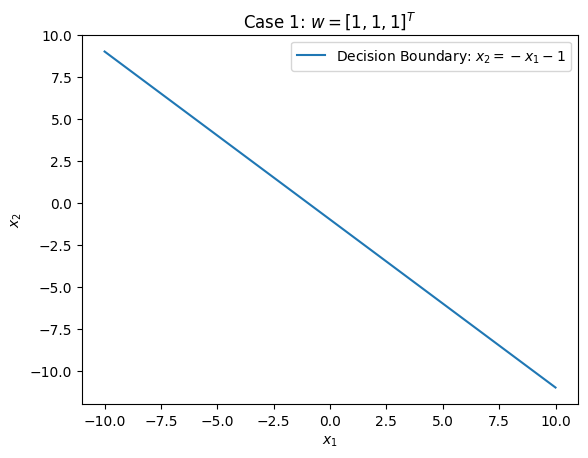

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

x1 = np.linspace(-10, 10, 100)
x2 = -x1 - 1

# Plot the decision boundary
plt.plot(x1, x2, label='Decision Boundary: $x_2 = -x_1 - 1$')
plt.title('Case 1: $w = [1, 1, 1]^T$')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.legend()
plt.show()


Case 2: $w = -[1, 2, 3]^T$ which is $w = [-1, -2, -3]^T$

Decision Boundary Equation: $$ w_0 + w_1x_1 + w_2x_2 = 0$$
Solve for $x_2$ $$ x_2 = -\frac{2}{3} x_1 - -\frac{1}{3}$$


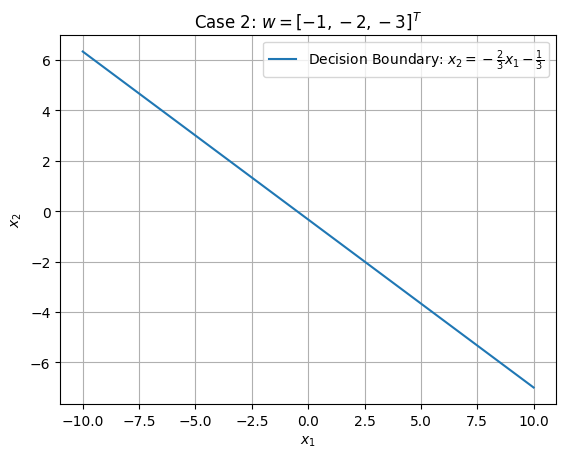

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

x1 = np.linspace(-10, 10, 100)
x2 = -2/3 * x1 - 1/3

# Plot the decision boundary
plt.plot(x1, x2, label='Decision Boundary: $x_2 = -\\frac{2}{3}x_1 - \\frac{1}{3}$')
plt.title('Case 2: $w = [-1, -2, -3]^T$')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.grid(True)
plt.legend()
plt.show()


#Q4. Let’s use an artificial data set to understand the PLA.

##Part A

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Generate a linearly separable dataset
x = np.random.uniform(-1, 1, (30, 2))
x = np.c_[np.ones(len(x)), x]  # Adding bias term
target_weights = np.random.uniform(-1, 1, 3)
y = np.sign(np.dot(x, target_weights))

# Generate x values for plotting the lines
x_values = np.linspace(-1, 1, 100)

In [ ]:
def decision_boundary_x2(x1, weights):
    return -(weights[0] + weights[1] * x1) / weights[2]

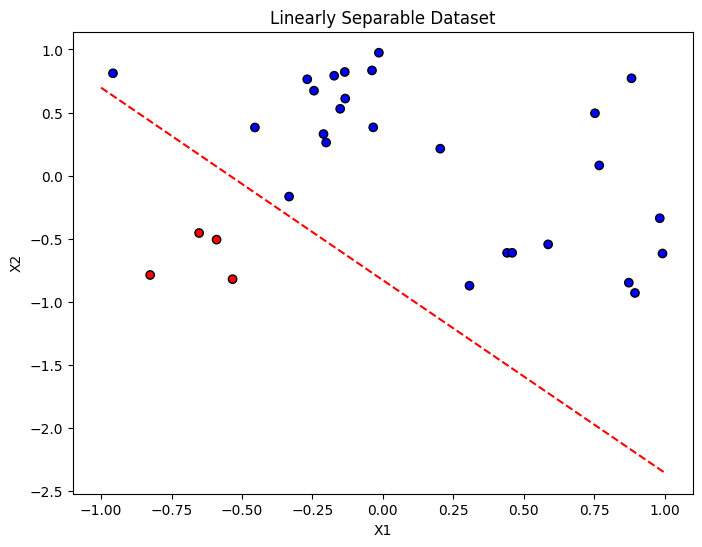

In [ ]:
# Plot the dataset
plt.figure(figsize=(8, 6))
plt.scatter(x[:, 1], x[:, 2], c=y, cmap=plt.cm.bwr, marker='o', edgecolors='k')
plt.xlabel("X1")
plt.ylabel("X2")

# Plot the target function
plt.plot(x_values, decision_boundary_x2(x_values, target_weights), 'r--', label='f (target function)')
plt.title("Linearly Separable Dataset")

plt.show()

## Part B

In [ ]:
def perceptron_learning_algorithm(x, y):
    weights = np.zeros(x.shape[1])  # Initialize weights
    converged = False
    iteration_count = 0
    while not converged:
        converged = True
        for i in range(len(x)):
            if np.sign(np.dot(x[i], weights)) != y[i]:
                weights += y[i] * x[i]
                converged = False
                iteration_count += 1
    return weights, iteration_count

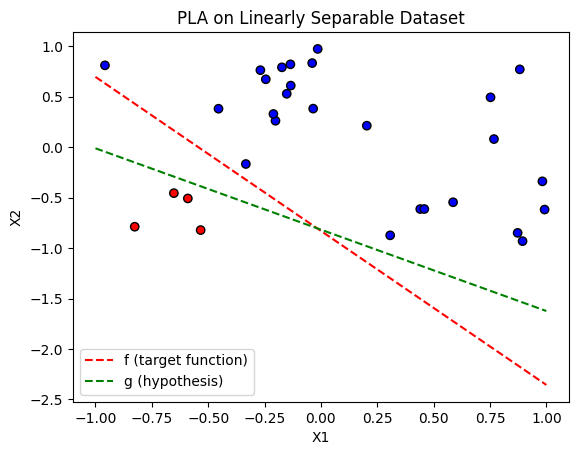

Number of updates before convergence: 5


In [ ]:
learned_weights, updates = perceptron_learning_algorithm(x, y)

# Plot the dataset
plt.scatter(x[:, 1], x[:, 2], c=y, cmap=plt.cm.bwr, marker='o', edgecolors='k')
plt.xlabel("X1")
plt.ylabel("X2")
plt.title("PLA on Linearly Separable Dataset")



# Plot the target function
plt.plot(x_values, decision_boundary_x2(x_values, target_weights), 'r--', label='f (target function)')

# Plot the hypothesis learned by PLA
plt.plot(x_values, decision_boundary_x2(x_values, learned_weights), 'g--', label='g (hypothesis)')

plt.legend()
plt.show()

# Print the number of updates before convergence
print("Number of updates before convergence:", updates)

The final hypothesis g closely aligns with the target function f, effectively separating the data points into their correct classes. This indicates that the Perceptron Learning Algorithm successfully learned a decision boundary similar to the target function

##Part C

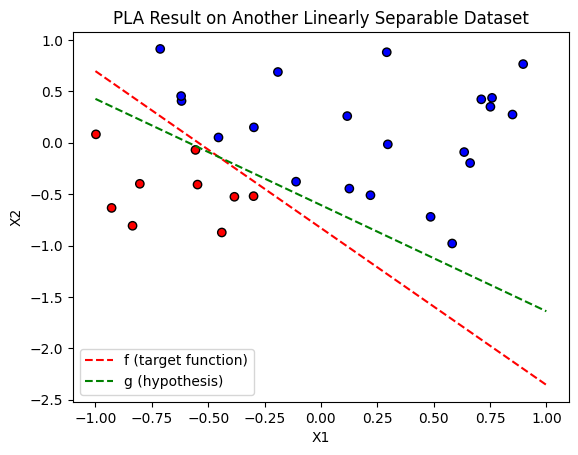

Number of updates before convergence: 7


In [ ]:

x_new = np.random.uniform(-1, 1, (30, 2))
x_new = np.column_stack((np.ones(len(x_new)), x_new))  # Add bias term
y_new = np.sign(np.dot(x_new, target_weights))

final_weights_new, num_updates_new = perceptron_learning_algorithm(x_new, y_new)
plt.scatter(x_new[:, 1], x_new[:, 2], c=y_new, cmap=plt.cm.bwr, marker='o', edgecolors='k')
plt.xlabel("X1")
plt.ylabel("X2")
plt.title("PLA Result on Another Linearly Separable Dataset")

# Plot the target function
plt.plot(x_values, decision_boundary_x2(x_values, target_weights), 'r--', label='f (target function)')

# Plot the hypothesis learned by PLA
plt.plot(x_values, decision_boundary_x2(x_values, final_weights_new), 'g--', label='g (hypothesis)')

plt.legend()
plt.show()

print("Number of updates before convergence:", num_updates_new)


##Part D

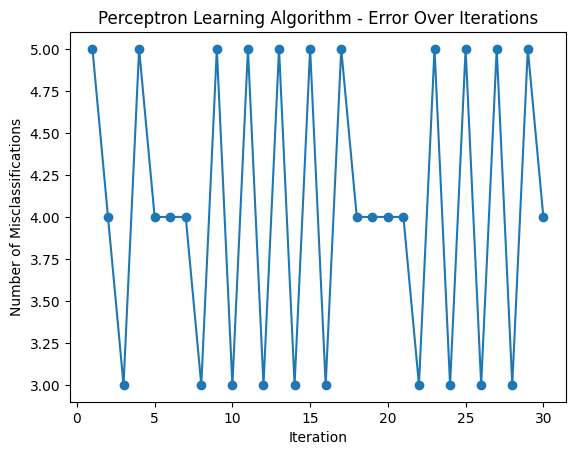

In [ ]:
X_non_linear = np.random.uniform(-1, 1, (10, 2))

# Add a bias term
X_non_linear = np.c_[np.ones(len(X_non_linear)), X_non_linear]

# Random weights for the target function
true_weights_non_linear = np.random.uniform(-1, 1, 3)

radius = 0.5
# Apply a non-linear transformation (quadratic transformation)
non_linear_decision = (
    X_non_linear[:,1]**2 + X_non_linear[:,2]**2 - radius**2 +
    true_weights_non_linear[1] * X_non_linear[:,1]**2 +
    true_weights_non_linear[2] * X_non_linear[:,2]**2 +
    true_weights_non_linear[0]
)
# Compute the dot product and assign labels using the sign function
y_non_linear = np.sign(non_linear_decision)
def perceptron_learning_algorithm(x, y, iterations):
    weights = np.zeros(x.shape[1])
    errors = []  # List to store number of misclassifications per iteration

    for _ in range(iterations):
        error_count = 0
        for i in range(len(x)):
            if np.sign(np.dot(x[i], weights)) != y[i]:
                weights += y[i] * x[i]
                error_count += 1
        errors.append(error_count)
        if error_count == 0:
            break

    return weights, errors

# Run PLA for 30 iterations
iterations = 30
weights, errors = perceptron_learning_algorithm(X_non_linear, y_non_linear, iterations)

# Plotting the error over iterations
plt.plot(range(1, len(errors) + 1), errors, marker='o')
plt.title('Perceptron Learning Algorithm - Error Over Iterations')
plt.xlabel('Iteration')
plt.ylabel('Number of Misclassifications')
plt.show()

We used misclassified points per iteration as our error metric. This counts the data points the perceptron gets wrong in each round, showing how well it's performing in reducing errors.

Since the plot shows that the error does not reduce to zero, we can modify the algorithm for non-linearly separable datasets, we can apply a non-linear transformation to the data so that it becomes linearly separable








#Q5. Digits Dataset

In [7]:
import numpy as np
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/drive')
!ls "/content/drive/MyDrive/Colab Notebooks/"

test_data = np.loadtxt("/content/drive/MyDrive/Colab Notebooks/ZipDigits.test")
train_data = np.loadtxt("/content/drive/MyDrive/Colab Notebooks/ZipDigits.train")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
 01_Crash_Course_and_Variables.ipynb   HW1_Tat_015660840.ipynb	      trainData.npy
 02_Lists_For_Loops_and_Ifs.ipynb      hw_template.ipynb	      ZipAlpha.test
 03_Numpy.ipynb			      'Linear_Regression (1).ipynb'   ZipAlpha.train
 04_IntroPandas_and_Charts.ipynb       Linear_Regression.ipynb	      ZipDigits.test
 hw1_5.ipynb			       Salary_Information.csv	      ZipDigits.train
 hw1_6.ipynb			       testData.npy


In [ ]:
def filtered_data(data):
    # Keep only digits '1' and '5'
    data = data[(data[:, 0] == 1) | (data[:, 0] == 5)]

    # Relabel: '1' -> 1, '5' -> -1
    data[:, 0] = np.where(data[:, 0] == 1, 1, -1)
    return data

In [ ]:
def extract_features(data):

    images = data[:, 1:]
    intensity = np.mean(images, axis=1)

    dimension = int(np.sqrt(images.shape[1]))
    images_reshaped = images.reshape(-1, dimension, dimension)
    flipped_images = np.flip(images_reshaped, axis=1)
    symmetry = np.mean(np.abs(images_reshaped - flipped_images), axis=(1, 2))

    return np.vstack((intensity, symmetry)).T

In [ ]:
def perceptron_learning_algorithm(x, y, max_iter=1000):
    # Initialize weights to zeros
    weight = np.zeros(x.shape[1])
    # PLA loop
    for _ in range(max_iter):
        misclassified = False
        for i in range(len(x)):
            if np.sign(np.dot(weight, x[i])) != y[i]:
                # Update rule for misclassified point
                weight += y[i] * x[i]
                misclassified = True
        if not misclassified:
            break
    return weight

In [ ]:
def visualize_random_image(data):
    # Randomly select an image from the dataset
    random_index = np.random.choice(data.shape[0])
    images = data[:, 1:]
    dimension = int(np.sqrt(images.shape[1]))
    images = images.reshape(-1, dimension, dimension)
    plt.imshow(images[random_index]  , cmap='Greys_r')
    plt.axis('off')
    plt.show()

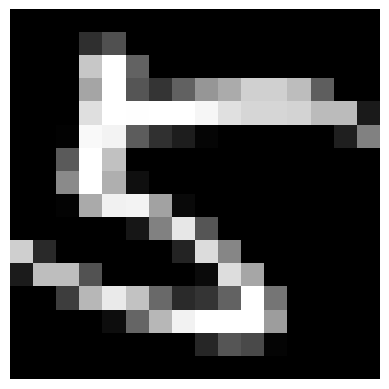

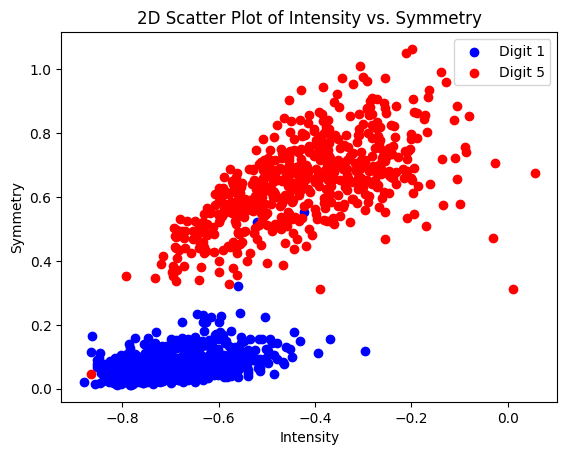

In [ ]:
train_data = filtered_data(train_data)
train_features = extract_features(train_data)
train_labels = train_data[:, 0]
visualize_random_image(train_data)

plt.scatter(train_features[train_labels == 1][:, 0], train_features[train_labels == 1][:, 1], color='blue', label='Digit 1')
plt.scatter(train_features[train_labels == -1][:, 0], train_features[train_labels == -1][:, 1], color='red', label='Digit 5')
plt.xlabel('Intensity')
plt.ylabel('Symmetry')
plt.legend()
plt.title('2D Scatter Plot of Intensity vs. Symmetry')
plt.show()

In [ ]:
test_data = filtered_data(test_data)
test_features = extract_features(test_data)
test_labels = test_data[:, 0]

# Adding bias to training features and test features
train_features = np.c_[np.ones(len(train_features)), train_features]
test_features = np.c_[np.ones(len(test_features)), test_features]

weights = perceptron_learning_algorithm(train_features, train_labels)

# Compute predictions and evaluate accuracy
predictions = np.sign(np.dot(test_features, weights))
accuracy = np.mean(predictions == test_labels) * 100

print(f'Test Accuracy: {accuracy:.2f}%')

Test Accuracy: 98.35%


#Q6. Alphabet Dataset

In [8]:
import numpy as np
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/drive')
!ls "/content/drive/MyDrive/Colab Notebooks/"

test_data = np.loadtxt("/content/drive/MyDrive/Colab Notebooks/ZipAlpha.test",delimiter=',', skiprows=1)
train_data = np.loadtxt("/content/drive/MyDrive/Colab Notebooks/ZipAlpha.train",delimiter=',', skiprows=1)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
 01_Crash_Course_and_Variables.ipynb   HW1_Tat_015660840.ipynb	      trainData.npy
 02_Lists_For_Loops_and_Ifs.ipynb      hw_template.ipynb	      ZipAlpha.test
 03_Numpy.ipynb			      'Linear_Regression (1).ipynb'   ZipAlpha.train
 04_IntroPandas_and_Charts.ipynb       Linear_Regression.ipynb	      ZipDigits.test
 hw1_5.ipynb			       Salary_Information.csv	      ZipDigits.train
 hw1_6.ipynb			       testData.npy


In [9]:
def filtered_data(data):
    # Filter the data to include only entries labeled 'C' or 'E'
    data = data[(data[:, 0] == 2) | (data[:, 0] == 4)]
    data[:, 0] = np.where(data[:, 0] == 2, 1, -1)
    return data

In [10]:
def extract_features(data):

    images = data[:, 1:]

    dimension = int(np.sqrt(images.shape[1]))
    images_reshaped = images.reshape(-1, dimension, dimension)

    middle_row = images_reshaped[:, dimension // 2, :]
    intensity = np.mean(middle_row, axis=1)

    flipped_images = np.flip(images_reshaped, axis=2)
    symmetry = np.mean(np.abs(images_reshaped - flipped_images), axis=(1, 2))

    # Combine features into a single array
    return np.vstack((intensity, symmetry)).T

In [11]:
def perceptron_learning_algorithm(x, y, max_iter=1000):
    # Initialize weights to zeros
    weight = np.zeros(x.shape[1])
    # PLA loop
    for _ in range(max_iter):
        misclassified = False
        for i in range(len(x)):
            if np.sign(np.dot(weight, x[i])) != y[i]:
                # Update rule for misclassified point
                weight += y[i] * x[i]
                misclassified = True
        if not misclassified:
            break
    return weight

In [13]:
def visualize_random_image(data):
    # Randomly select an image from the dataset
    random_index = np.random.choice(data.shape[0])
    images = data[:, 1:]
    dimension = int(np.sqrt(images.shape[1]))
    images = images.reshape(-1, dimension, dimension)
    plt.imshow(images[random_index]  , cmap='Greys_r')
    plt.axis('off')
    plt.show()

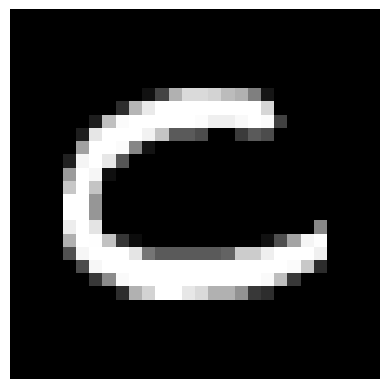

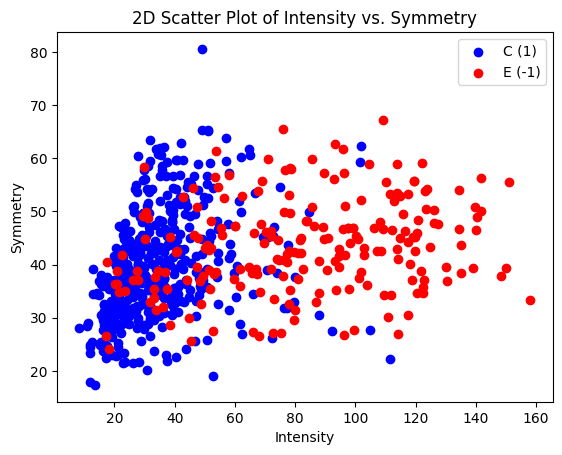

In [14]:
train_data = filtered_data(train_data)
train_features = extract_features(train_data)
train_labels = train_data[:, 0]
visualize_random_image(train_data)

plt.scatter(train_features[train_labels == 1][:, 0], train_features[train_labels == 1][:, 1], color='blue', label='C (1)')
plt.scatter(train_features[train_labels == -1][:, 0], train_features[train_labels == -1][:, 1], color='red', label='E (-1)')
plt.xlabel('Intensity')
plt.ylabel('Symmetry')
plt.legend()
plt.title('2D Scatter Plot of Intensity vs. Symmetry')
plt.show()

In [ ]:
test_data = filtered_data(test_data)
test_features = extract_features(test_data)
test_labels = test_data[:, 0]

# Adding bias to training features and test features
train_features = np.c_[np.ones(len(train_features)), train_features]
test_features = np.c_[np.ones(len(test_features)), test_features]

weights = perceptron_learning_algorithm(train_features, train_labels)

# Compute predictions and evaluate accuracy
predictions = np.sign(np.dot(test_features, weights))
accuracy = np.mean(predictions == test_labels) * 100

print(f'Test Accuracy: {accuracy:.2f}%')

Test Accuracy: 85.37%


#Q7. Digits and Alphabet Dataset

There was a clear difference in accuracy between questions 5 and 6 using the Perceptron Learning Algorithm. It performed better with numbers '1' and '5' because their simple, distinct shapes are well-suited to basic features like intensity and symmetry. For the more similar-looking letters 'C' and 'E' focusing on the middle row's intensity helped better distinguish them. Calculating this row's average brightness reveals differences that distinguish 'C' from 'E'.






